# Example code for 5 models

In [36]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import pandas as pd
import csv

Y_position = 5

# fix random seed for reproducibility
np.random.seed(7)

dataset = np.loadtxt("Alumni Giving Regression (Edited).csv", delimiter="," )
# split into input (X) and output (Y) variables

df = pd.DataFrame(dataset)
print(df)
	# summary statistics
print(df.describe())

corr=df.corr(method ='pearson')
print(corr)
corr.to_csv('corr.csv')

X = dataset[:,0:Y_position]
Y = dataset[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)


#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")
print("================================")
RMSE_train1 = mean_squared_error(y_train,y_pred_train1)

print("Regression TrainSet: RMSE {}".format(RMSE_train1))
print("================================")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
print("================================")
print("================================")
print("================================")


#Model 2 decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("Decision Tree")
print("================================")
y_pred_train2 = model2.predict(X_train)
RMSE_train2 = mean_squared_error(y_train,y_pred_train2)
print("Decision Tree TrainSet: RMSE {}".format(RMSE_train2))
print("================================")
y_pred_test2 = model2.predict(X_test)
RMSE_test2 = mean_squared_error(y_test,y_pred_test2)
print("Decision Tree TestSet: RMSE {}".format(RMSE_test2))
print("================================")
print("================================")
print("================================")
print("================================")


#Model 3 Random Forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#warm_start=False, ccp_alpha=0.0, max_samples=None)

model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
print("Random Forest Regressor")
print("================================")
y_pred_train3 = model3.predict(X_train)
RMSE_train3 = mean_squared_error(y_train,y_pred_train3)
print("Random Forest Regressor TrainSet: RMSE {}".format(RMSE_train3))
print("================================")
y_pred_test3 = model3.predict(X_test)
RMSE_test3 = mean_squared_error(y_test,y_pred_test3)
print("Random Forest Regressor TestSet: RMSE {}".format(RMSE_test3))
print("================================")
print("================================")
print("================================")
print("================================")


#model 4: XgBoost
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
#class sklearn.ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, 
#criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
#min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, 
#tol=0.0001, ccp_alpha=0.0)

model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)
print("Gradient Boosting Regressor")
print("================================")
y_pred_train4 = model4.predict(X_train)
RMSE_train4 = mean_squared_error(y_train,y_pred_train4)
print("Gradient Boosting Regressor TrainSet: RMSE {}".format(RMSE_train4))
print("================================")
y_pred_test4 = model4.predict(X_test)
RMSE_test4 = mean_squared_error(y_test,y_pred_test4)
print("Gradient Boosting Regressor TestSet: RMSE {}".format(RMSE_test4))
print("================================")
print("================================")
print("================================")
print("================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate

print("Neural Network")
print("================================")
model = Sequential()
model.add(Dense(64, input_dim=Y_position, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate
model.compile(loss='MSE', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=0)
# evaluate the model
predictions5 = model.predict(X_train)
RMSE_train5 = mean_squared_error(y_train,predictions5)
print("Neural Network TrainSet: RMSE {}".format(RMSE_train5))
print("==================================")
predictions5 = model.predict(X_test)
RMSE_test5 = mean_squared_error(y_test,predictions5)
print("Neural Network TestSet: RMSE {}".format(RMSE_test5))
print("================================")
print("================================")
print("================================")




        0     1     2     3     4     5
0    24.0  0.42  0.16  0.59  0.81  0.08
1    19.0  0.49  0.04  0.37  0.69  0.11
2    18.0  0.24  0.17  0.66  0.87  0.31
3     8.0  0.74  0.00  0.81  0.88  0.11
4     8.0  0.95  0.00  0.86  0.92  0.28
..    ...   ...   ...   ...   ...   ...
118  11.0  0.54  0.03  0.89  0.94  0.29
119  15.0  0.37  0.22  0.69  0.83  0.13
120  23.0  0.32  0.19  0.59  0.80  0.12
121  19.0  0.43  0.06  0.49  0.73  0.13
122  19.0  0.36  0.11  0.52  0.74  0.10

[123 rows x 6 columns]
                0           1           2           3           4           5
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000
mean    17.772358    0.403659    0.136260    0.645203    0.841138    0.141789
std      4.517385    0.133897    0.060101    0.169794    0.083942    0.080674
min      6.000000    0.140000    0.000000    0.260000    0.580000    0.020000
25%     16.000000    0.320000    0.095000    0.505000    0.780000    0.080000
50%     18.000000    0.38000

## Model helper function


In [37]:
def train_and_predict_using_model(model_name= "",model=None):
    model.fit(X_train, y_train)
    print(model_name)
    print("================================")
    y_pred_train = model.predict(X_train)
    RMSE_train = mean_squared_error(y_train,y_pred_train)
    print("TrainSet: RMSE {}".format(RMSE_train))
    print("================================")
    y_pred_test = model.predict(X_test)
    RMSE_test = mean_squared_error(y_test,y_pred_test)
    print("TestSet: RMSE {}".format(RMSE_test))
    print("================================")

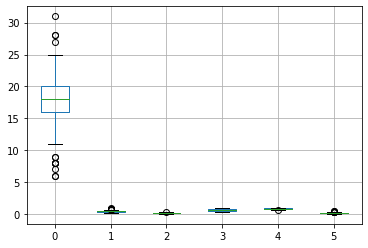

In [38]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(dataset).boxplot()

## Remove outlier

In [39]:
df = pd.DataFrame(dataset)
quantile = df[0].quantile(0.99)
df1 = df[df[0] < quantile]
df.shape

(123, 6)

In [40]:
df1.shape

(120, 6)

## Remove NA

In [41]:
df1 = df1.dropna()

## Feature importance

### Feature importances with forests of trees

In [42]:
import numpy
RF = model3
importances = RF.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature (Column index) 3 (0.346682)
2. feature (Column index) 1 (0.217437)
3. feature (Column index) 0 (0.174081)
4. feature (Column index) 4 (0.172636)
5. feature (Column index) 2 (0.089163)


## Use top 3 features


In [43]:
indices_top3 = indices[:3]
print(indices_top3)

df = pd.DataFrame(dataset)

Y_position = 5
TOP_N_FEATURE = 3

X = dataset[:,indices_top3]
Y = dataset[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

#Model 1 : linear regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")
print("================================")
RMSE_train1 = mean_squared_error(y_train,y_pred_train1)

print("Regression TrainSet: RMSE {}".format(RMSE_train1))
print("================================")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
print("================================")
print("================================")
print("================================")


#Model 2 decision tree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html


model2 = tree.DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("Decision Tree")
print("================================")
y_pred_train2 = model2.predict(X_train)
RMSE_train2 = mean_squared_error(y_train,y_pred_train2)
print("Decision Tree TrainSet: RMSE {}".format(RMSE_train2))
print("================================")
y_pred_test2 = model2.predict(X_test)
RMSE_test2 = mean_squared_error(y_test,y_pred_test2)
print("Decision Tree TestSet: RMSE {}".format(RMSE_test2))
print("================================")
print("================================")
print("================================")
print("================================")


#Model 3 Random Forest
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, 
#min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
#warm_start=False, ccp_alpha=0.0, max_samples=None)

model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
print("Random Forest Regressor")
print("================================")
y_pred_train3 = model3.predict(X_train)
RMSE_train3 = mean_squared_error(y_train,y_pred_train3)
print("Random Forest Regressor TrainSet: RMSE {}".format(RMSE_train3))
print("================================")
y_pred_test3 = model3.predict(X_test)
RMSE_test3 = mean_squared_error(y_test,y_pred_test3)
print("Random Forest Regressor TestSet: RMSE {}".format(RMSE_test3))
print("================================")
print("================================")
print("================================")
print("================================")


#model 4: XgBoost
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
#class sklearn.ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, 
#criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
#min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, 
#verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, 
#tol=0.0001, ccp_alpha=0.0)

model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)
print("Gradient Boosting Regressor")
print("================================")
y_pred_train4 = model4.predict(X_train)
RMSE_train4 = mean_squared_error(y_train,y_pred_train4)
print("Gradient Boosting Regressor TrainSet: RMSE {}".format(RMSE_train4))
print("================================")
y_pred_test4 = model4.predict(X_test)
RMSE_test4 = mean_squared_error(y_test,y_pred_test4)
print("Gradient Boosting Regressor TestSet: RMSE {}".format(RMSE_test4))
print("================================")
print("================================")
print("================================")
print("================================")

#Model 5: neural network
#https://www.tensorflow.org/guide/keras/train_and_evaluate

print("Neural Network")
print("================================")
model = Sequential()
model.add(Dense(64, input_dim=TOP_N_FEATURE, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# Compile mode
# https://www.tensorflow.org/guide/keras/train_and_evaluate
model.compile(loss='MSE', optimizer='Adamax', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=300, batch_size=5, verbose=0)
# evaluate the model
predictions5 = model.predict(X_train)
RMSE_train5 = mean_squared_error(y_train,predictions5)
print("Neural Network TrainSet: RMSE {}".format(RMSE_train5))
print("==================================")
predictions5 = model.predict(X_test)
RMSE_test5 = mean_squared_error(y_test,predictions5)
print("Neural Network TestSet: RMSE {}".format(RMSE_test5))
print("================================")
print("================================")
print("================================")

[3 1 0]
Regression
Regression TrainSet: RMSE 0.0027952079052752685
Regression Testset: RMSE 0.00434175802813964
Decision Tree
Decision Tree TrainSet: RMSE 0.0
Decision Tree TestSet: RMSE 0.0075239999999999994
Random Forest Regressor
Random Forest Regressor TrainSet: RMSE 0.0004767974489795915
Random Forest Regressor TestSet: RMSE 0.005291914
Gradient Boosting Regressor
Gradient Boosting Regressor TrainSet: RMSE 0.0003038484585159878
Gradient Boosting Regressor TestSet: RMSE 0.00551448430334344
Neural Network
Neural Network TrainSet: RMSE 0.02496122448979592
Neural Network TestSet: RMSE 0.032824


# Other models and how to configure|

### Ridge

- alpla
    - Larger values specify stronger regularization. 

In [44]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
train_and_predict_using_model('Ridge',clf)

Ridge
TrainSet: RMSE 0.002975496177792466
TestSet: RMSE 0.004543969704506036


In [45]:
clf.coef_

array([ 0.16013109,  0.08400627, -0.00431646])

In [46]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.0001)
train_and_predict_using_model('Ridge',clf)

Ridge
TrainSet: RMSE 0.0027952079100891317
TestSet: RMSE 0.004341765763126526


In [47]:
clf.coef_

array([ 0.2305282 ,  0.16026612, -0.00115048])

In [48]:
print("First model has stronger regularization effect -- weights driven to 0")

First model has stronger regularization effect -- weights driven to 0


## Lasso
- alpla
    - Larger values specify stronger regularization. 

In [49]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
train_and_predict_using_model('Ridge',clf)

Ridge
TrainSet: RMSE 0.004765559626087362
TestSet: RMSE 0.00600596003981286


In [50]:
clf.coef_

array([ 0.        ,  0.        , -0.00491704])

In [52]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.0001)
train_and_predict_using_model('Lasso',clf)

Ridge
TrainSet: RMSE 0.0027965373174448287
TestSet: RMSE 0.004339222279430154


In [53]:
clf.coef_

array([ 0.22702558,  0.15021319, -0.00143782])

In [54]:
print("First model has stronger regularization effect -- weights driven to 0")

First model has stronger regularization effect -- weights driven to 0


## Polynomial regression

- Param:
    - degree (if 2 means X1*X2, if 3 means X1*X2*X3)
    - interaction_only (if false, then can do square....) Refer to https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [63]:
from sklearn.preprocessing import PolynomialFeatures

X_poly_example = np.array([[1, 0], [2, 0], [3, 2], [4, 2]])
X_poly_example

array([[1, 0],
       [2, 0],
       [3, 2],
       [4, 2]])

In [56]:
X_poly_example = PolynomialFeatures(interaction_only=True).fit_transform(X_poly_example).astype(int)

In [57]:
print(X_poly_example)
print("First column is intercept which is default 1")
print("Last column is interaction ie (3*2=6 and 4*2=8)")

[[1 1 0 0]
 [1 2 0 0]
 [1 3 2 6]
 [1 4 2 8]]
First column is intercept which is default 1
Last column is interaction ie (3*2=6 and 4*2=8)


In [64]:
poly = PolynomialFeatures(interaction_only=True).fit(X_train)
X_train = poly.transform(X_train)
print(np.array.size(X_train))
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
RMSE_train = mean_squared_error(y_train,y_pred_train)
print("TrainSet: RMSE {}".format(RMSE_train))

X_test = poly.transform(X_test)
y_pred1 = clf.predict(X_test)
RMSE_test = mean_squared_error(y_test,y_pred1)
print("TestSet: RMSE {}".format(RMSE_test))

KeyboardInterrupt: ignored